# Stage 03: Python Fundamentals


In [1]:
import numpy as np
import time
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
print("### Elementwise operations demo")
x = np.arange(10, dtype=float)
y = x * 2 + 3        # multiply then add
z = np.sqrt(y)       # elementwise square root


print("x:", x)
print("y = x*2 + 3:", y)
print("z = sqrt(y):", np.round(z, 4))

### Elementwise operations demo
x: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
y = x*2 + 3: [ 3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]
z = sqrt(y): [1.7321 2.2361 2.6458 3.     3.3166 3.6056 3.873  4.1231 4.3589 4.5826]


In [3]:
print("\n### Loop vs Vectorized timing")
def square_loop(arr: np.ndarray) -> np.ndarray:
    out = np.empty_like(arr)
    for i in range(arr.size):
        out[i] = arr[i] * arr[i]
    return out

def square_vectorized(arr: np.ndarray) -> np.ndarray:
    return arr * arr

n = 300_000
arr = np.arange(n, dtype=float)


### Loop vs Vectorized timing


In [4]:
# Warmup
_ = square_vectorized(arr)

t0 = time.perf_counter()
loop_res = square_loop(arr)
t_loop = time.perf_counter() - t0

t0 = time.perf_counter()
vec_res = square_vectorized(arr)
t_vec = time.perf_counter() - t0

same = np.allclose(loop_res, vec_res)

print(f"Array size: {n:,}")
print(f"Loop time: {t_loop:.4f} s")
print(f"Vectorized time: {t_vec:.6f} s")
print(f"Speedup: {t_loop / max(t_vec, 1e-12):.1f}x")
print("Results identical:", same)

Array size: 300,000
Loop time: 0.0479 s
Vectorized time: 0.000372 s
Speedup: 128.9x
Results identical: True


In [5]:
csv_path = Path("/Users/souhil/bootcamp_souhil_khiat/homework/homework3/data/starter_data.csv")
df = pd.read_csv(csv_path, parse_dates=["date"])  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  10 non-null     object        
 1   value     10 non-null     int64         
 2   date      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 372.0+ bytes


In [7]:
df.head()

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [8]:
summary = df["value"].describe()
summary

count    10.000000
mean     17.600000
std       7.381659
min      10.000000
25%      12.250000
50%      14.500000
75%      23.250000
max      30.000000
Name: value, dtype: float64

In [9]:
numeric_cols = df.select_dtypes(include="number").columns
grouped = df.groupby("category")[numeric_cols].agg(["mean", "std", "count", "min", "max"])
grouped

value                        
               mean       std count min max
category                                   
A         11.500000  1.290994     4  10  13
B         15.666667  2.081666     3  14  18
C         27.666667  2.516611     3  25  30

Saved files in: /Users/souhil/bootcamp_souhil_khiat/homework/homework3/data/processed


<Figure size 640x480 with 0 Axes>

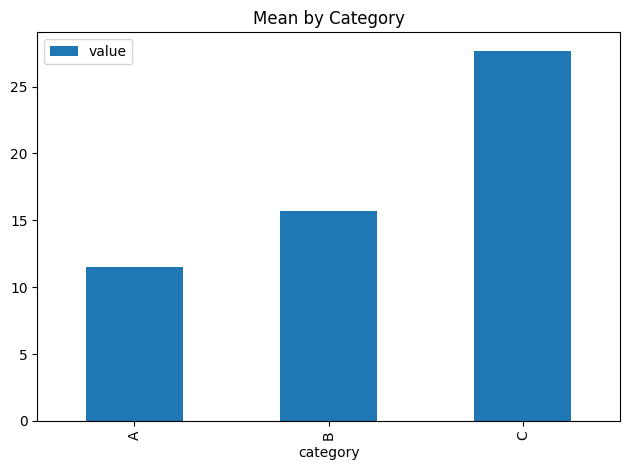

In [10]:
processed = Path("data/processed")
processed.mkdir(parents=True, exist_ok=True)

# Save summary stats
summary.to_csv(processed / "summary.csv")
summary.to_json(processed / "summary.json", orient="table")

# Save groupby results
grouped.to_csv(processed / "group_summary.csv")

# Bonus plot: mean of each numeric column by category (bar)
mean_by_cat = df.groupby("category")[numeric_cols].mean()
plt.figure()
mean_by_cat.plot(kind="bar", title="Mean by Category")
plt.tight_layout()
plt.savefig(processed / "mean_by_category.png")
print("Saved files in:", processed.resolve())

In [11]:
from src.utils import get_summary_stats

get_summary_stats(df)

,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667


## 